ipython notebook to see if different splashback cuts remove specific subpopulations of galaxies

In [1]:
import numpy as np 
# -- iquench -- 
from letstalkaboutquench import util as UT
from letstalkaboutquench import catalogs as Cats

In [34]:
import corner as DFM
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in `name` catalog

In [93]:
name = 'eagle'

In [94]:
cats = Cats.Catalog()
logM, logSFR, _, _ = cats.Read(name+'_inst')


------ eagle_inst ------
10295 of 29810 galaxies have 0/non-finite SFRs


In [95]:
psat = cats.GroupFinder(name+'_inst')

In [96]:
nosb_3vir = np.loadtxt(''.join([UT.dat_dir(), name, '.GF_splashback.3vir.dat']), 
                       skiprows=2, unpack=True, usecols=[0])
nosb_3vir = nosb_3vir.astype(int).astype(bool)

In [97]:
nosb_geha = np.loadtxt(''.join([UT.dat_dir(), name, '.GF_splashback.geha.dat']), 
                       skiprows=2, unpack=True, usecols=[0])
nosb_geha = nosb_geha.astype(int).astype(bool)

In [98]:
assert len(logM) == len(nosb_geha)

(-4.0, 1.0)

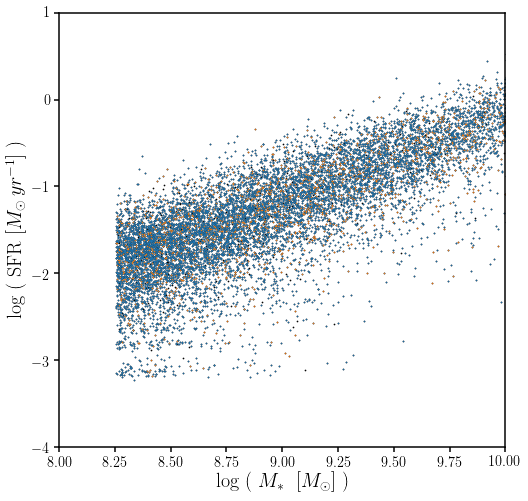

In [99]:
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(111)
sub.scatter(logM[psat < 0.01], logSFR[psat < 0.01], c='k', s=0.5)
sub.scatter(logM[nosb_3vir], logSFR[nosb_3vir], c='C0', s=0.25)
sub.scatter(logM[nosb_geha], logSFR[nosb_geha], c='C1', s=0.25)
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([8., 10.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 1.])

(-4.0, 1.0)

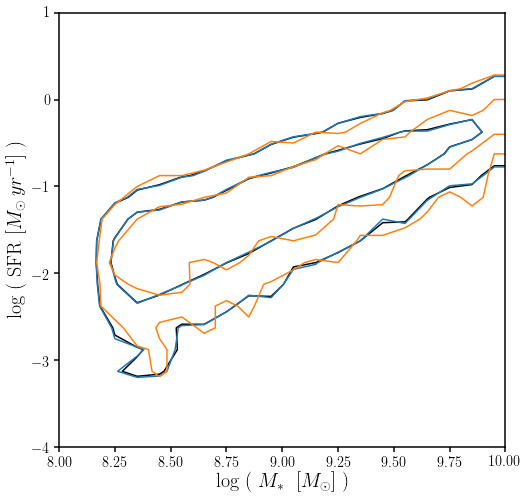

In [100]:
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(111)
DFM.hist2d(logM[psat < 0.01], logSFR[psat < 0.01], color='k',
           levels=[0.68, 0.95], range=[[8.,10.], [-4.,1.]], 
           fill_contour=False, plot_density=False, plot_datapoints=False,
           ax=sub)
DFM.hist2d(logM[nosb_3vir], logSFR[nosb_3vir], color='C0',
           levels=[0.68, 0.95], range=[[8.,10.], [-4.,1.]], 
           fill_contour=False, plot_density=False, plot_datapoints=False,
           ax=sub)
DFM.hist2d(logM[nosb_geha], logSFR[nosb_geha],color='C1',
           levels=[0.68, 0.95], range=[[8.,10.], [-4.,1.]], 
           fill_contour=False, plot_density=False, plot_datapoints=False,           
           ax=sub)
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([8., 10.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 1.])

(-4.0, 1.0)

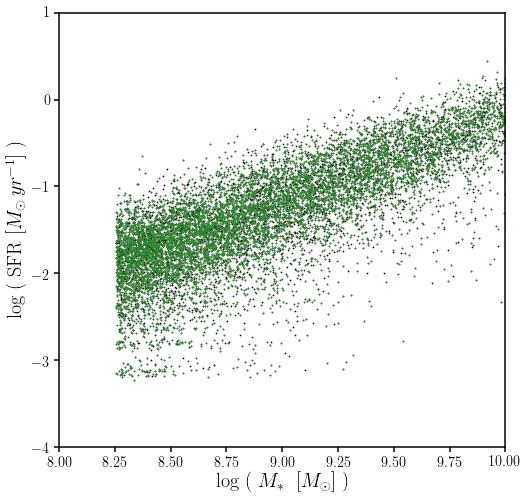

In [101]:
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(111)
sub.scatter(logM[psat < 0.01], logSFR[psat < 0.01], c='k', s=0.5)
sub.scatter(logM[nosb_3vir & ~nosb_geha], logSFR[nosb_3vir & ~nosb_geha], c='C2', s=0.25)
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([8., 10.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 1.])

(8.0, 10.0)

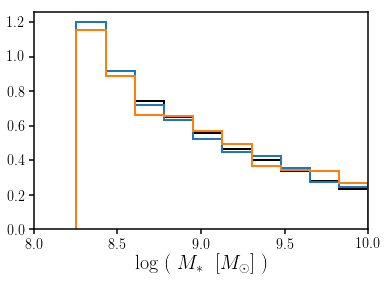

In [113]:
fig = plt.figure()
sub = fig.add_subplot(111)
_ = sub.hist(logM[(logM < 10.)], density=True, histtype='step', color='k', linewidth=2)
_ = sub.hist(logM[nosb_3vir & (logM < 10.)], density=True, histtype='step', linewidth=2)
_ = sub.hist(logM[nosb_geha & (logM < 10.)], density=True, histtype='step', linewidth=2)
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([8., 10.])

(-4.0, 1.0)

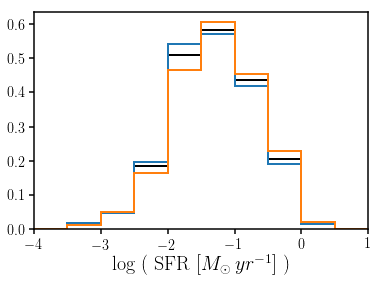

In [111]:
fig = plt.figure()
sub = fig.add_subplot(111)
_ = sub.hist(logSFR[(logM < 10.)], range=(-4., 1.), density=True, histtype='step', color='k', linewidth=2)
_ = sub.hist(logSFR[nosb_3vir & (logM < 10.)], range=(-4., 1.), density=True, histtype='step', linewidth=2)
_ = sub.hist(logSFR[nosb_geha & (logM < 10.)], range=(-4., 1.), density=True, histtype='step', linewidth=2)
sub.set_xlabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_xlim([-4., 1.])